# 机器学习简介

**机器学习**（**machine learning**）通常被看做是**人工智能**（**artificial intelligence**）的一部分，通常指用一些**算法**（**algorithm**）和**统计模型**（**statistical model**）让计算机通过学习一些特定的模式、特征，完成一些特定的任务，而不需要太多的人工干预。根据Goodfellow, Bengio和Courville(2016)的定义，机器学习是一系列应用统计方法，这些方法将重点聚焦在使用计算机估计复杂的函数，而更少的强调置信区间等传统统计工具。

最常见的机器学习任务可以分为两种:

* **监督学习**（**supervised learning**）：适用于带有**标签**（**labels**）的学习算法，通过算法和模型确定一些**特征**（**features**）的函数，对目标变量进行预测。比如我们常见的各种**回归**（**regression**）在机器学习中是典型的监督学习算法。根据标签的不同，监督学习又可以分为：
    - **分类**（**classification**），标签为离散变量
    - **回归**（**regression**），标签为连续变量
* **无监督学习**（**unsupervised learning**）：适用于没有标签的学习算法，通过发现数据中的结构对数据进行一些操作，比如**聚类**（**clustering**）、**降维**（**dimension reduction**）、**流形学习**（**manifold learning**）等。

此外还有**半监督学习**（**semi-supervised learning**），指的是针对标签不完整的数据的学习算法。除了以上分类之外，还有**增强学习**（**reinforcement learning**）等等很多领域。

在机器学习中，通常将已有的**数据**称为**训练集**（**training set**）或者**训练数据**（**training data**），机器学习的任务就是从训练集中找到特征的特定函数（模式），对新的数据进行预测。

而为了评估所训练的模型的预测能力，我们需要机器学习模型性能的度量，这在不同的算法中表现不同，比如在线性回归中，一个简单的度量是$R^2$，即度量了线性回归模型的拟合优度。此外，还有调整的$R^2$、AIC、BIC等各种度量方法。而在分类问题中，还有查全率、查准率、精确度等不同的度量方法。

而机器学习模型特别注重**样本外**预测能力，即对不在训练集中的数据进行预测，预测能力的强弱。机器学习模型对于新样本的预测能力一般称之为**泛化**（**generalization**）能力。机器学习的难点就在于训练和选取泛化能力最好的模型。

# 机器学习中的算法

**算法**（**algorithm**）即计算方法，是一个计算机科学的专有名词，即通过一定的抽象和步骤解决显示问题的方法。一般算法和数据结构紧密结合在一起，目标是用最少的时间、最小的空间解决计算任务。

比如，查找和排序是计算机中的经典算法。查找即在一堆对象中如何能够快速的找到符合条件的对象，比如经典的散列化，如哈希（hash）算法等。一个简单的例子就是《现代汉语字典》，为了找到一个字或者词，可以根据拼音首字母进行查找，这样就大大降低了查找时间。

而机器学习算法指的是针对某些任务，从数据中进行学习，使用恰当的方法训练模型，以尽量达到更好的预测效果。机器学习中的算法通常有两个重要的部分组成：

* 损失函数，定义了预测误差的惩罚，即我们希望最小化的目标函数
* 优化方法，如何将损失函数降到最低的方法

比如，在最简单的线性回归中，针对一个连续变量$y_i$，使用一些特征$x_i$进行预测，普通最小二乘法（OLS）定义了损失函数：$$\sum_{i=1}^N\left(y_i-x_i'\beta\right)^2$$即预测误差的平方和，将以上损失函数最小化即可。而为了最小化以上目标函数，可以使用梯度下降的方法（牛顿法、BFGS算法等），从一个任意的初始值$\beta_0$开始，通过不断的迭代找到使得损失函数最小的解$\beta^*$。当然，OLS有解析解，实际操作中并不需要真的进行迭代。

更加一般的，损失函数可以用极大似然估计中的**对数似然函数**（**log-likelihood function**），比如如果假设$$y_i|x_i\sim N\left(x_i'\beta,\sigma^2\right)$$那么损失函数可以写为：$$\sum_{i=1}^N\left[-\ln\left(\sigma\right)-\frac{\left(y_i-x_i'\beta\right)^2}{2\sigma^2}\right]$$

以上是有监督学习的损失函数。多数无监督学习也是按照以上思路进行的，比如各种聚类分析、主成分分析、流形学习等，都是通过最小化某个目标函数得到的。


# 机器学习的一般步骤

与其他的数据分析一样，机器学习也需要数据的累积以及对数据的仔细清洗。在进行模型分析之前的数据清洗、特征提取等前期工作可以很大程度上避免garbage in garbage out，是非常重要的。

一般而言我们使用数据做分析的步骤如下：

## 1. 获取数据

数据很多情况下是现成的，当然很多时候获取数据非常困难，我们可能需要从网络上去爬取数据，有时甚至需要去搜集很多pdf、图像等数据。好在现在网络上已经有很多公开数据可以使用。

即使获取数据比较轻松，一个比较麻烦的问题是标签的获取。特别是在监督学习中，没有标签就不可能进行接下来的分析。由于标签是机器学习的benchmark，如果标签的误差比较大或者缺失太多，对模型的准确性影响特别大，需要特别注意。

## 2. 清洗数据

得到数据之后需要对数据进行一些必要的清洗工作，因为我们得到的数据总归是不完美的，而且经常是非常混乱的，此时我们需要对数据进行一些仔细的清洗，比如对数据进行初步的缺失值处理（填充、虚拟变量）、合并、删减、标签化，以及对文本数据的分词、删除停用词等等操作。

## 3. 特征工程

接下来，在清洗好数据的基础上，需要在已有的信息上提取特征，比如对某些变量进行适当变换（对数、虚拟变量）、将文本转变为向量、将图像转变为可识别的tensor等等。

这一步非常重要，如果将机器学习看成是某种程度上的函数拟合器的话，好的特征工程可以降低函数的复杂性，从而更容易达到更好的效果。往往我们需要思考以现有的数据，何种特征结合模型才能有更好的结果，这需要对应用背景、数据以及模型的深刻理解。

## 4. 模型训练

这一步通常来讲反倒是最简单的，有了以上铺垫之后，通常算法都是现成的，调包侠都会做。

## 5. 模型评价

接下来使用各种方法评价模型，对模型的精准性做出判断，并重复以上四个步骤进行改进。

# 模型评价：过拟合与欠拟合

机器学习的目的是通过对训练集的训练，得到一个函数，对未知的新数据做预测。一方面，模型应该要有足够的预测和拟合能力，如果模型的拟合能力不足，没有发现本可以在训练集中发现的模式，我们称之为**欠拟合**（**underfitting**）；另一方面，如果一味提高拟合和预测能力，那么不可避免的会选择复杂度更高的模型，错误地将一些数据中的噪音当做信号进行拟合，我们称之为**过拟合**（**overfitting**）。

![](pic/fitting.png "过拟合、欠拟合与恰好拟合")

欠拟合会导致预测能力低下，而过拟合会导致虽然在训练集上看起来有非常好的预测效果，但是对于样本外的新数据进来，预测效果却很差，或者说泛化能力很差。两者都是在建模师需要避免的。为此，我们需要更加科学的评价模型的方法。

在实践中，欠拟合和过拟合通常对用于太“小”或者太“大”的模型：如果模型太小，则无法充分挖掘数据中的模式，造成欠拟合；而模型太大，往往模型会发现其实并不存在的模式，造成过拟合。模型的“大小”可以使用模型的**容量**（**capacity**）来表示。比如，对于一个二分类问题，可以使用**VC维**（**Vapnik-Chervonenkis dimension**）来表示。机器学习算法需要在“大”的模型和“小”的模型之间做出权衡，根据样本量等条件选取一个最合适的模型大小，避免欠拟合和过拟合的问题。

# Scikit-Learn简介

Python中有非常多的机器学习相关的包和库，其中Scikit-Learn（ https://scikit-learn.org/stable/ ）由于比较统一的接口和易用性，成为了这些包里面最为流行的一个。

Scikit-Learn建立在NumPy和SciPy的基础上，当然，支持NumPy就意味着Pandas也完全支持。比如如果需要做一些理论研究、模拟工作，NumPy+SciPy+Pandas可以很好的配合起来解决问题，而如果需要实际数据，Pandas的数据管理能力配合Scikit-Learn也非常方便。

对于非监督学习，通常我们只需要使用Pandas或者NumPy整理好需要的数据即可；而对于监督学习，除了准备好特征数据$X$之外，还需要准备好标签向量$y$。

常见的机器学习算法，包括分类、聚类、回归等等，以及包括交叉验证、正则化等都已经在Scikit-Learn中有很好的实现，甚至包括一些特征提取的功能，比如文本数据的特征提取的一些常用方法，也都在Scikit-Learn中有实现。具体教程和文档可以参考其官方网站。

接下来我们将主要使用Scikit-Learn进行机器学习的学习。

在下面的例子中，我们初步展示如何使用Scikit-Learn进行简单的线性回归和预测，并展示我们上面提到的欠拟合、过拟合和恰好拟合的例子。

In [1]:
import pandas as pd
import numpy as np
## 产生随机数据
np.random.seed(1900)  #设置seed以便每次运行的结果都一样
x = np.random.random(20) * 10  #(0,10)的均匀分布
y = (x - 5)**2 + np.random.normal(0, 3, 20)  # 真实的模型为二次方模型
data = pd.DataFrame({'x': x, 'y': y})
## 产生多项式
for i in range(10):
    data['x' + str(i + 1)] = x**(i + 1)
## 对数据进行排序以便后面画图
data = data.sort_values('x')
data.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
12,0.170818,21.661212,0.170818,0.029179,0.004984,0.000851,0.000145,0.000025,0.000004,7.248882e-07,1.238240e-07,2.115138e-08
5,0.200585,22.630727,0.200585,0.040234,0.008070,0.001619,0.000325,0.000065,0.000013,2.620470e-06,5.256256e-07,1.054324e-07
7,0.560665,20.160809,0.560665,0.314346,0.176243,0.098813,0.055401,0.031061,0.017415,9.764041e-03,5.474359e-03,3.069283e-03
9,1.328871,12.342606,1.328871,1.765898,2.346651,3.118397,4.143948,5.506772,7.317790,9.724400e+00,1.292247e+01,1.717230e+01
19,1.460317,16.008789,1.460317,2.132525,3.114163,4.547664,6.641030,9.698009,14.162165,2.068125e+01,3.020118e+01,4.410329e+01


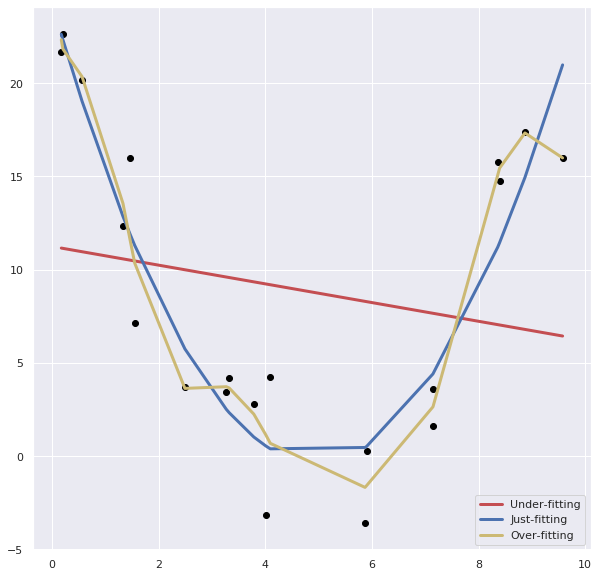

In [2]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sb

# 使用x的一次方
reg1 = linear_model.LinearRegression()  ##创建线性回归模型
reg1.fit(np.array(data['x1']).reshape(20, 1), data['y'])  ## 训练模型
yhat1 = reg1.predict(np.array(data['x1']).reshape(20, 1))  ## 进行预测
# 使用x的二次方
reg2 = linear_model.LinearRegression()
reg2.fit(data[['x1', 'x2']], data['y'])
yhat2 = reg2.predict(data[['x1', 'x2']])
# 使用x的10次方
reg3 = linear_model.LinearRegression()
reg3.fit(data.drop(['x', 'y'], axis=1), data['y'])
yhat3 = reg3.predict(data.drop(['x', 'y'], axis=1))

# 作图
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(data['x'], yhat1, c='r', lw=3, label='Under-fitting')
plt.plot(data['x'], yhat2, c='b', lw=3, label='Just-fitting')
plt.plot(data['x'], yhat3, c='y', lw=3, label='Over-fitting')
plt.scatter(data['x'], data['y'], c='black')
plt.legend(loc='lower right', frameon=True)
plt.show()